In [1]:
import pandas as pd
df = pd.read_csv("wbank_Data.csv")
print(df.columns)


Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2024 [YR2024]', '2023 [YR2023]', '2022 [YR2022]', '2021 [YR2021]',
       '2020 [YR2020]', '2019 [YR2019]', '2018 [YR2018]', '2017 [YR2017]',
       '2016 [YR2016]', '2015 [YR2015]', '2014 [YR2014]', '2013 [YR2013]',
       '2012 [YR2012]', '2011 [YR2011]', '2010 [YR2010]', '2009 [YR2009]',
       '2008 [YR2008]', '2007 [YR2007]', '2006 [YR2006]', '2005 [YR2005]',
       '2004 [YR2004]', '2003 [YR2003]', '2002 [YR2002]', '2001 [YR2001]',
       '2000 [YR2000]', '1999 [YR1999]', '1998 [YR1998]', '1997 [YR1997]',
       '1996 [YR1996]', '1995 [YR1995]', '1994 [YR1994]', '1993 [YR1993]',
       '1992 [YR1992]', '1991 [YR1991]', '1990 [YR1990]', '1989 [YR1989]',
       '1988 [YR1988]', '1987 [YR1987]', '1986 [YR1986]', '1985 [YR1985]',
       '1984 [YR1984]', '1983 [YR1983]', '1982 [YR1982]', '1981 [YR1981]',
       '1980 [YR1980]', '1979 [YR1979]', '1978 [YR1978]', '1977 [YR1977]',
       '1976 [YR1976]', '1975 [

Data structure is not ideal for analyzes, because years are in columns. Checking countries before handling the year-column problem with pycountry module:

In [29]:
import pycountry

# Load dataset
df = pd.read_csv("wbank_Data.csv")

# Try to resolve each Country Code to a country name
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return None

df["Resolved Name"] = df["Country Code"].apply(get_country_name)

# Show sample results
print(df[["Country Code", "Country Name", "Resolved Name"]].drop_duplicates().sort_values("Country Code").to_string())


     Country Code                                                               Country Name                           Resolved Name
54            ABW                                                                      Aruba                                   Aruba
1302          AFE                                                Africa Eastern and Southern                                    None
0             AFG                                                                Afghanistan                             Afghanistan
1308          AFW                                                 Africa Western and Central                                    None
30            AGO                                                                     Angola                                  Angola
6             ALB                                                                    Albania                                 Albania
24            AND                                                    

Remove non countries

In [30]:
import pandas as pd
import pycountry

# Load dataset
df = pd.read_csv("wbank_Data.csv")

# Get all valid ISO3 country codes
valid_iso3 = {c.alpha_3 for c in pycountry.countries}

# Keep only rows where Country Code is a valid ISO3 code
df = df[df["Country Code"].isin(valid_iso3)]

print(f"Kept {len(df)} rows with valid ISO3 country codes.")
print(f"Removed non-country codes (EUU, WLD, etc.).")


Kept 1290 rows with valid ISO3 country codes.
Removed non-country codes (EUU, WLD, etc.).


In [33]:

# Try to resolve each Country Code to a country name
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return None

df["Resolved Name"] = df["Country Code"].apply(get_country_name)

# Show sample results
print(df[["Country Code", "Country Name", "Resolved Name"]].drop_duplicates().sort_values("Country Code").to_string())


     Country Code                    Country Name                           Resolved Name
54            ABW                           Aruba                                   Aruba
0             AFG                     Afghanistan                             Afghanistan
30            AGO                          Angola                                  Angola
6             ALB                         Albania                                 Albania
24            AND                         Andorra                                 Andorra
1224          ARE            United Arab Emirates                    United Arab Emirates
42            ARG                       Argentina                               Argentina
48            ARM                         Armenia                                 Armenia
18            ASM                  American Samoa                          American Samoa
36            ATG             Antigua and Barbuda                     Antigua and Barbuda
60        

Checking results

In [23]:
import pandas as pd
import pycountry_convert as pc
import pycountry

# --- Working continent function ---
def get_continent(code):
    try:
        alpha2 = pc.country_alpha3_to_country_alpha2(code)
        cont_code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(cont_code)
    except:
        return None

# --- Working country name function ---
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return None

# --- Load dataset ---
df = pd.read_csv("wbank_Data.csv")

# --- Get unique country codes ---
codes = sorted(df["Country Code"].dropna().unique().tolist())

# --- Build table of results ---
results = []
for code in codes:
    name = get_country_name(code)
    cont = get_continent(code)
    results.append((code, name, cont))

# --- Convert to DataFrame and show ---
df_results = pd.DataFrame(results, columns=["Country Code", "Country Name", "Continent"])
df_results = df_results.sort_values("Country Name")

print(df_results.to_string(index=False))


Country Code                           Country Name     Continent
         AFG                            Afghanistan          Asia
         ALB                                Albania        Europe
         DZA                                Algeria        Africa
         ASM                         American Samoa       Oceania
         AND                                Andorra        Europe
         AGO                                 Angola        Africa
         ATG                    Antigua and Barbuda North America
         ARG                              Argentina South America
         ARM                                Armenia          Asia
         ABW                                  Aruba North America
         AUS                              Australia       Oceania
         AUT                                Austria        Europe
         AZE                             Azerbaijan          Asia
         BHS                                Bahamas North America
         B

Still not good. "None" countries are present

In [34]:
# Resolve to real country names
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return None

df["Resolved Name"] = df["Country Code"].apply(get_country_name)

# Keep only rows where a real country was found
df = df[df["Resolved Name"].notna()]

print(f"Kept {len(df)} rows (real countries only).")
print(f"Removed non-country codes (regional or aggregate entries).")


Kept 1290 rows (real countries only).
Removed non-country codes (regional or aggregate entries).


In [35]:
print(df[["Country Code", "Country Name", "Resolved Name"]]
      .drop_duplicates()
      .sort_values("Country Code")
      .head(50)
      .to_string())

print(f"\nTotal unique Country Codes remaining: {df['Country Code'].nunique()}")


     Country Code              Country Name                          Resolved Name
54            ABW                     Aruba                                  Aruba
0             AFG               Afghanistan                            Afghanistan
30            AGO                    Angola                                 Angola
6             ALB                   Albania                                Albania
24            AND                   Andorra                                Andorra
1224          ARE      United Arab Emirates                   United Arab Emirates
42            ARG                 Argentina                              Argentina
48            ARM                   Armenia                                Armenia
18            ASM            American Samoa                         American Samoa
36            ATG       Antigua and Barbuda                    Antigua and Barbuda
60            AUS                 Australia                              Australia
66  

Results seems good for countries. Now create a year column and remove columns for individual years to reduce variables.

In [36]:
# --- Convert from wide to long format (years become rows instead of columns) ---
df = df.melt(
    id_vars=["Country Name", "Country Code", "Series Name", "Series Code", "Resolved Name"],
    var_name="Year",
    value_name="Value"
)

# --- Clean the Year column (extract 4-digit year from text like '2024 [YR2024]') ---
df["Year"] = df["Year"].str.extract(r"(\d{4})").astype(float)

# --- Show result preview ---
print(df.head(20).to_string())
print(f"\nTotal rows after reshaping: {len(df)}")


      Country Name Country Code                                                          Series Name     Series Code   Resolved Name    Year             Value
0      Afghanistan          AFG                                 Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN     Afghanistan  2024.0                ..
1      Afghanistan          AFG                                                    Population, total     SP.POP.TOTL     Afghanistan  2024.0          42647492
2      Afghanistan          AFG                                   GDP per capita (constant 2015 US$)  NY.GDP.PCAP.KD     Afghanistan  2024.0                ..
3      Afghanistan          AFG  Unemployment, total (% of total labor force) (modeled ILO estimate)  SL.UEM.TOTL.ZS     Afghanistan  2024.0            13.295
4      Afghanistan          AFG                                                        Net migration     SM.POP.NETM     Afghanistan  2024.0            -44089
5      Afghanistan          AFG               

Not clear what happend. Check data structure.

In [37]:
# --- Show column structure and data types ---
print(df.info())

# --- Also show the column names in one line for clarity ---
print("\nColumns:")
print(list(df.columns))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83850 entries, 0 to 83849
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   83850 non-null  object 
 1   Country Code   83850 non-null  object 
 2   Series Name    83850 non-null  object 
 3   Series Code    83850 non-null  object 
 4   Resolved Name  83850 non-null  object 
 5   Year           83850 non-null  float64
 6   Value          83850 non-null  object 
dtypes: float64(1), object(6)
memory usage: 4.5+ MB
None

Columns:
['Country Name', 'Country Code', 'Series Name', 'Series Code', 'Resolved Name', 'Year', 'Value']


Variables are stored in Series Name, Series Code. Transform structure to have separate columns for each variable.

In [38]:
# --- Convert 'Series Name' values into separate columns ---
df_wide = df.pivot_table(
    index=["Country Name", "Country Code", "Resolved Name", "Year"],
    columns="Series Name",
    values="Value",
    aggfunc="first"
).reset_index()

# --- Flatten multi-level column index ---
df_wide.columns.name = None

# --- Show structure ---
print(df_wide.info())
print(df_wide.head(10).to_string())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13975 entries, 0 to 13974
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country Name                                                         13975 non-null  object 
 1   Country Code                                                         13975 non-null  object 
 2   Resolved Name                                                        13975 non-null  object 
 3   Year                                                                 13975 non-null  float64
 4   Average precipitation in depth (mm per year)                         13975 non-null  object 
 5   Birth rate, crude (per 1,000 people)                                 13975 non-null  object 
 6   GDP per capita (constant 2015 US$)                                   13975 non-null  object 
 7   Net 

Clean data further with removing ".." (missing data") and create numberic values.

In [39]:
# --- Convert numeric columns from strings to real numbers (replace '..' with NaN) ---
df_wide = df_wide.replace("..", pd.NA)

# Try to convert all columns except the identifiers
cols_to_num = df_wide.columns.difference(["Country Name", "Country Code", "Resolved Name", "Year"])
df_wide[cols_to_num] = df_wide[cols_to_num].apply(pd.to_numeric, errors="coerce")

# --- Check structure again ---
print(df_wide.info())
print(df_wide.head(5).to_string())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13975 entries, 0 to 13974
Data columns (total 10 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country Name                                                         13975 non-null  object 
 1   Country Code                                                         13975 non-null  object 
 2   Resolved Name                                                        13975 non-null  object 
 3   Year                                                                 13975 non-null  float64
 4   Average precipitation in depth (mm per year)                         10448 non-null  float64
 5   Birth rate, crude (per 1,000 people)                                 13730 non-null  float64
 6   GDP per capita (constant 2015 US$)                                   11235 non-null  float64
 7   Net 

Now checking one line to see the structure

In [40]:
# --- Select one example row (e.g. Afghanistan, 1960) ---
row = df_wide[(df_wide["Country Name"] == "Afghanistan") & (df_wide["Year"] == 1960)].iloc[0]

# --- Print each variable on a separate line ---
for col, val in row.items():
    print(f"{col:70} : {val}")


Country Name                                                           : Afghanistan
Country Code                                                           : AFG
Resolved Name                                                          : Afghanistan
Year                                                                   : 1960.0
Average precipitation in depth (mm per year)                           : nan
Birth rate, crude (per 1,000 people)                                   : 50.516
GDP per capita (constant 2015 US$)                                     : nan
Net migration                                                          : 2606
Population, total                                                      : 9035043.0
Unemployment, total (% of total labor force) (modeled ILO estimate)    : nan


Create a datacut as backup from the cleaned data as csv


In [41]:
# --- Export the cleaned and reshaped dataset ---
df_wide.to_csv("wbank_clean_longwide.csv", index=False)
print("Saved backup file: wbank_clean_longwide.csv")


Saved backup file: wbank_clean_longwide.csv


Let's have a quick review of the 6 variables - chaning in time.

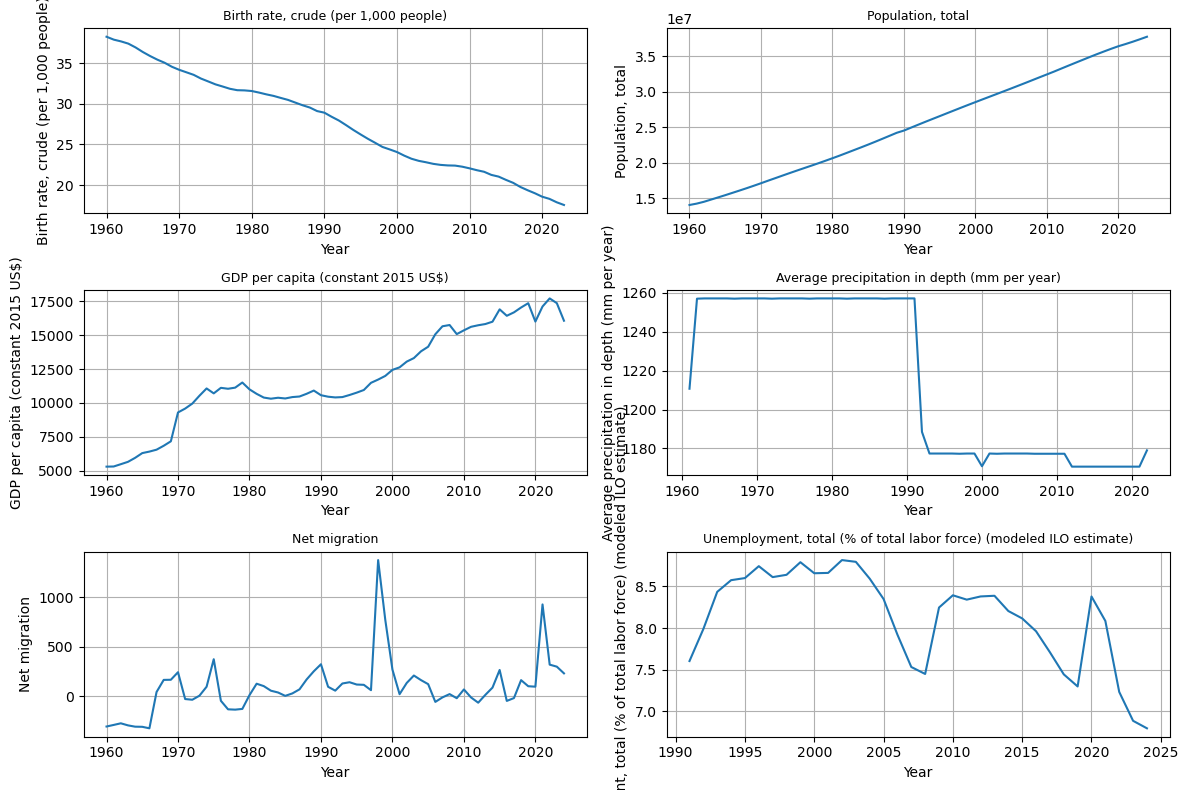

In [55]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 100

variables = [
    "Birth rate, crude (per 1,000 people)",
    "Population, total",
    "GDP per capita (constant 2015 US$)",
    "Average precipitation in depth (mm per year)",
    "Net migration",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)"
]

df_wide["Year"] = pd.to_numeric(df_wide["Year"], errors="coerce")

# --- Create grid of 2 columns x 3 rows ---
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

# --- Plot each variable in its subplot ---
for i, var in enumerate(variables):
    df_plot = df_wide.groupby("Year")[var].mean().sort_index()
    axes[i].plot(df_plot.index, df_plot.values)
    axes[i].set_title(var, fontsize=9)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel(var)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


First recognition:
Birth rate is declining, but population is still growing - looking linear. If birth rate would still grow, the population growth would be exponential. 